# extra√ß√£o do texto do PDF

# Portugu√™s

In [1]:
import PyPDF2

import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import RSLPStemmer

import string
import re

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud

In [2]:
from sumario import Sumario

In [3]:
# importa dados que vamos usar 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')   # conjunto de textos em portugu√™s anotados com etiquetas morfossint√°ticas
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /Users/alvaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /Users/alvaro/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/alvaro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### remover n√∫mero da p√°gina

In [4]:
def removerNumeroPagina(pagina :str) -> str:
    if pagina[3:5].isdigit():
        pagina = pagina[5:]
        
    return pagina

### remover pontua√ß√£o

In [5]:
def removerPontuacao(texto :str) -> str:
    return "".join(caractere for caractere in texto if caractere not in string.punctuation)

### Extrair texto do PDF

In [6]:
def lerPDF(arquivo :str) -> str:
    artigo = PyPDF2.PdfReader(arquivo)
    texto = ''
    referencias = ''
    for pagina in artigo.pages:
        paginaExtraida = removerNumeroPagina(pagina.extract_text())
        if 'refer√™ncias' not in paginaExtraida[:20].lower() and referencias == '':
            texto += paginaExtraida
        else:
            referencias += paginaExtraida


    return texto, referencias

### Lamatizar artigo

In [7]:
def lamatizarPalavra(palavra :str) -> str:
    stemmer = RSLPStemmer()     # Removedor de Sufixos da L√≠ngua Portuguesa
    lemma = stemmer.stem(palavra)
    if lemma == palavra:
        synsets = wordnet.synsets(palavra, lang='por')
        if synsets:
            lemma = synsets[0].lemmas()[0].name()
    return lemma

In [8]:
def lamatizarTexto(texto :str) -> str:
    palavras = texto.split()
    stopwordsPT = stopwords.words('portuguese')
    textoLematizado = [lamatizarPalavra(palavra.lower()) for palavra in palavras if palavra.lower() not in stopwordsPT]
    textoLematizado = ' '.join(textoLematizado)
    return textoLematizado

## Identifica√ß√£o

### Identificar objetivo

In [9]:
OBJ = PyPDF2.PdfReader('ArquivosPT/DAR20052019.pdf')
obj = OBJ.pages[14].extract_text()

In [17]:
# contar p√°ginas
len(OBJ.pages)

37

### identificar problema

In [4]:
from sumario import Sumario

In [5]:
x = Sumario('ArquivosPT/DAR20052019.pdf')

In [6]:
x.getSumario()

{'introdu√ß√£o': '13',
 'tema': '15',
 'objetivo geral': '15',
 'objetivos espec√≠ficos': '15',
 'estrutura do trabalho': '16',
 'conceitos gerais': '17',
 'perceptron e feedforward': '17',
 'fun√ß√£o de erro gradiente descendente e': '18',
 'fun√ß√£o de ativa√ß√£o': '20',
 'momentum': '21',
 'dropout': '21',
 'data augmentation': '28',
 'convolu√ß√£o': '22',
 'redes neurais convolucionais': '23',
 'camada convolucional': '23',
 'camada de pooling': '24',
 'camada totalmente conectada': '25',
 'metodologia': '26',
 'obten√ß√£o do banco de placas veiculares': '26',
 'obten√ß√£o dos recortes das placas ve√≠culares': '27',
 'processo de padroniza√ß√£o das imagens': '27',
 'arquitetura da rede': '28',
 'treinamento da rede': '29',
 'apresenta√ß√£o e an√°lise dos resultados': '30',
 'conclus√µes e trabalhos futuros': '35',
 'refer√™ncias': '36'}

In [7]:
print(x.getPaginasTopico('introdu√ß√£o'))

['13', '15']


## classe dos objetivos do trabalho

In [ ]:
# TODO talvez ler o arquivo e mandar o objeto dele para cada classe extrair o que precisa
class trabalho():
    def __init__(self, path :str):
        self.__sumario = Sumario(path)
        self.__objetivo = None
        self.__metodologia = None
        self.__problema = None
        self.__referencia = None
        self.__contribuicao = None

## Processar texto

In [27]:
def preProcessamento(arquivo :str) -> str:
    textoPreProcessado, referencias = lerPDF(arquivo)
    referenciaPreProcessada = extrairReferencias(referencias)
    textoPreProcessado = removerPontuacao(textoPreProcessado)
    textoPreProcessado = lamatizarTexto(textoPreProcessado)
    objetivo = extrairObjetivos(textoPreProcessado)
   
    return textoPreProcessado, referenciaPreProcessada, objetivo

In [28]:
textoPRE, REFErencias, objeTIVO = preProcessamento('ArquivosPT/DAR20052019.pdf')

In [32]:
REFErencias

['ara√∫jo , fl√°vio h. d. ; carneiro , allan c. ; silva , romuere r. v. ; medeiros , f√°tima n. s. ; ushizima , daniela m.  redes neurais convolucionais com tensorÔ¨Çow: teoria e pr√°tica . iii escola regional de inform√°tica do piau√≠. livro anais - artigos e minicursos, v. 1, n. 1,  p. 382 -406, jun, 2017.  dispon√≠vel em:  http://www.eripi.com.br/2017/images/anais/minicursos/7.pdf . acesso em: 1 5 out. 2018',
 'barca , maria carolina stockler ; silveira , tiago redondo de siqueira ; magini , marcio . treinamento de redes neurais artificiais: o algoritmo  backpropagation . in: ix encontro latino americano de inicia√ß√£o cient√≠fica e v encontro latino americano de p√≥s -gradua√ß√£o, universidade do vale do para√≠ba. vale do para√≠ba: univap; 200 5. p. 46-49. dispon√≠vel em:  http://www.inicepg.u nivap.br/cd/inic_2005/inic/ic1%20anais/ic1 -17.pdf . acesso em: 12 out. 2018',
 'dpl, deep learning book. cap√≠tulo 23 ‚Äì como funciona o dropout? . dispon√≠vel em:  http://deeplearningbook.

### contagem dos termos do artigo

In [8]:
def contagemTermos(texto :str) -> dict:
    palavras = texto.split()
    return Counter(palavras)

In [9]:
def nuvemPalavras(texto :str, quantidadePalavras: int) -> None:
    contagemPalavras = contagemTermos(texto)

    palavras = dict(contagemPalavras.most_common(quantidadePalavras))

    nuvem_palavras = WordCloud()
    nuvem_palavras.generate_from_frequencies(palavras)

    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [10]:
contagemPalavras = contagemTermos(artigoPreProcessado)
contagemPalavras.most_common(10)

[('red', 51),
 ('imag', 43),
 ('plac', 42),
 ('neur', 35),
 ('process', 34),
 ('figur', 34),
 ('fun√ß', 32),
 ('cam', 32),
 ('exempl', 30),
 ('dad', 29)]

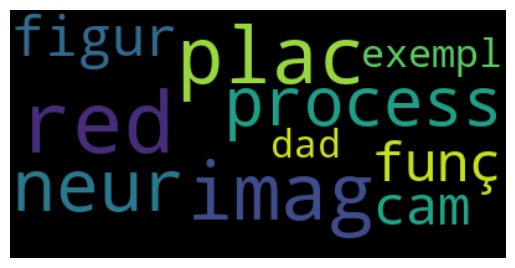

In [11]:
nuvemPalavras(artigoPreProcessado, 10)

### Identificar objetivo

In [14]:
artigo.pages[14].extract_text()

' \n 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento \nautom√°tico de placas de licenciamento surge como op√ß√£o possivelmente vi√°vel as \ntradicionais t√©cni cas de vis√£o computacional e aprendizado de m√°quina existentes, e j√° \nutilizadas comercialmente, para resolver esse problema em espec√≠fico.  \n1.1 Tema  \nEste trabalho tem por tema, como o t√≠tulo sugere, o Deep Learning  com \n√™nfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em \nplacas veiculares. Tendo como hip√≥tese a possibilidade de se resolver o problema \napenas com o uso de uma CNN , removendo -se a etapa de segmenta√ß√£o dos caracteres, \ncomum para sistemas que buscam resolver o problema . \n1.1.1 Objetivo geral  \nDemonstrar a viabilidade da resolu√ß√£o do problema de reconhecimento de \nplacas de licenciamento veiculares utilizando apenas uma CNN . \n1.1.2 Objetivos espec√≠ficos  \n‚Ä¢ Criar uma base de dados com placas de licenciamento veiculares \nbra

In [30]:
print(artigo.pages[14].extract_text())

 
 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento 
autom√°tico de placas de licenciamento surge como op√ß√£o possivelmente vi√°vel as 
tradicionais t√©cni cas de vis√£o computacional e aprendizado de m√°quina existentes, e j√° 
utilizadas comercialmente, para resolver esse problema em espec√≠fico.  
1.1 Tema  
Este trabalho tem por tema, como o t√≠tulo sugere, o Deep Learning  com 
√™nfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em 
placas veiculares. Tendo como hip√≥tese a possibilidade de se resolver o problema 
apenas com o uso de uma CNN , removendo -se a etapa de segmenta√ß√£o dos caracteres, 
comum para sistemas que buscam resolver o problema . 
1.1.1 Objetivo geral  
Demonstrar a viabilidade da resolu√ß√£o do problema de reconhecimento de 
placas de licenciamento veiculares utilizando apenas uma CNN . 
1.1.2 Objetivos espec√≠ficos  
‚Ä¢ Criar uma base de dados com placas de licenciamento veiculares 
brasileiras ; 
‚Ä¢ D

In [23]:
artigo.pages[10]

{'/Type': '/Page',
 '/Parent': {'/Type': '/Pages',
  '/Count': 37,
  '/Kids': [IndirectObject(3, 0, 140386117728624),
   IndirectObject(17, 0, 140386117728624),
   IndirectObject(19, 0, 140386117728624),
   IndirectObject(21, 0, 140386117728624),
   IndirectObject(23, 0, 140386117728624),
   IndirectObject(27, 0, 140386117728624),
   IndirectObject(31, 0, 140386117728624),
   IndirectObject(35, 0, 140386117728624),
   IndirectObject(37, 0, 140386117728624),
   IndirectObject(39, 0, 140386117728624),
   IndirectObject(42, 0, 140386117728624),
   IndirectObject(43, 0, 140386117728624),
   IndirectObject(44, 0, 140386117728624),
   IndirectObject(45, 0, 140386117728624),
   IndirectObject(46, 0, 140386117728624),
   IndirectObject(47, 0, 140386117728624),
   IndirectObject(48, 0, 140386117728624),
   IndirectObject(49, 0, 140386117728624),
   IndirectObject(51, 0, 140386117728624),
   IndirectObject(54, 0, 140386117728624),
   IndirectObject(56, 0, 140386117728624),
   IndirectObject(58, 

# TExte

In [92]:
artigo = PyPDF2.PdfReader('ArquivosPT/DAR20052019.pdf')

In [93]:
'refer√™ncias' in artigo.pages[35].extract_text()[:20].lower()

True

In [100]:
artigo.pages[14].extract_text()

' \n 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento \nautom√°tico de placas de licenciamento surge como op√ß√£o possivelmente vi√°vel as \ntradicionais t√©cni cas de vis√£o computacional e aprendizado de m√°quina existentes, e j√° \nutilizadas comercialmente, para resolver esse problema em espec√≠fico.  \n1.1 Tema  \nEste trabalho tem por tema, como o t√≠tulo sugere, o Deep Learning  com \n√™nfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em \nplacas veiculares. Tendo como hip√≥tese a possibilidade de se resolver o problema \napenas com o uso de uma CNN , removendo -se a etapa de segmenta√ß√£o dos caracteres, \ncomum para sistemas que buscam resolver o problema . \n1.1.1 Objetivo geral  \nDemonstrar a viabilidade da resolu√ß√£o do problema de reconhecimento de \nplacas de licenciamento veiculares utilizando apenas uma CNN . \n1.1.2 Objetivos espec√≠ficos  \n‚Ä¢ Criar uma base de dados com placas de licenciamento veiculares \nbra

In [110]:
referencia = ''
objetivo = ''

for art in artigo.pages:
    if 'refer√™ncias' in art.extract_text().lower():
        referencia = art.extract_text()
    elif 'objetivo geral  \n' in art.extract_text().lower():
        objetivo = art.extract_text()

In [111]:
print(referencia)

 
 36 REFER√äNCIAS  
ARA√öJO , Fl√°vio H. D. ; CARNEIRO , Allan C. ; SILVA , Romuere R. V. ; MEDEIROS , F√°tima 
N. S. ; USHIZIMA , Daniela M.  Redes Neurais Convolucionais com TensorÔ¨Çow: Teoria e 
Pr√°tica . III Escola Regional de Inform√°tica do Piau√≠. Livro Anais - Artigos e Minicursos, v. 1, 
n. 1,  p. 382 -406, jun, 2017.  Dispon√≠vel em:  
http://www.eripi.com.br/2017/images/anais/minicursos/7.pdf . Acesso em: 1 5 out. 2018.  
BARCA , Maria Carolina Stockler ; SILVEIRA , Tiago Redondo de Siqueira ; MAGINI , Marcio . 
TREINAMENTO DE REDES NEURAIS ARTIFICIAIS: O ALGORITMO  
BACKPROPAGATION . In: IX Encontro Latino Americano de Inicia√ß√£o Cient√≠fica e V 
Encontro Latino Americano de P√≥s -gradua√ß√£o, Universidade do Vale do Para√≠ba. Vale do 
Para√≠ba: Univap; 200 5. p. 46-49. Dispon√≠vel em:  
http://www.inicepg.u nivap.br/cd/INIC_2005/inic/IC1%20anais/IC1 -17.pdf . Acesso em: 12 
out. 2018.  
DPL, Deep Learning Book. Cap√≠tulo 23 ‚Äì Como Funciona o Dropout? . Dispon√≠vel em

In [112]:
print(objetivo)

 
 15 Aplicar o modelo de CNNs  para resolver o problema do reconhecimento 
autom√°tico de placas de licenciamento surge como op√ß√£o possivelmente vi√°vel as 
tradicionais t√©cni cas de vis√£o computacional e aprendizado de m√°quina existentes, e j√° 
utilizadas comercialmente, para resolver esse problema em espec√≠fico.  
1.1 Tema  
Este trabalho tem por tema, como o t√≠tulo sugere, o Deep Learning  com 
√™nfase no uso das CNNs  para resolver o pro blema do reconhecimento de caracteres em 
placas veiculares. Tendo como hip√≥tese a possibilidade de se resolver o problema 
apenas com o uso de uma CNN , removendo -se a etapa de segmenta√ß√£o dos caracteres, 
comum para sistemas que buscam resolver o problema . 
1.1.1 Objetivo geral  
Demonstrar a viabilidade da resolu√ß√£o do problema de reconhecimento de 
placas de licenciamento veiculares utilizando apenas uma CNN . 
1.1.2 Objetivos espec√≠ficos  
‚Ä¢ Criar uma base de dados com placas de licenciamento veiculares 
brasileiras ; 
‚Ä¢ D

In [96]:
for art in artigo.pages:
    print(art.extract_text())

 
 
 
 
 
 
 
 
DEEP LEARNING E REDES NEURAIS 
CONVOLUCIONAIS: RECONHECIMENTO 
AUTOM√ÅTICO DE CARACTERES EM 
PLACAS DE LICENCIAMENTO 
AUTOMOTIVO  
 
 
 
Diego Alves Rodrigues  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
CENTRO DE INFORM√ÅTICA  
UNIVERSIDADE FEDERAL DA PARA√çBA  
 
 
 
 
 
Jo√£o Pessoa, 2018  

 
 
  
 
 
 
Diego Alves Rodrigues  
 
 
 
 
 
 
 
 
 
 
DEEP LEARNING E REDES NEURAIS 
CONVOLUCIONAIS: RECONHECIMENTO 
AUTOM√ÅTICO DE CARACTERES EM PLACAS DE 
LICENCIAMENTO AUTOMOTIVO.  
 
 
 
 
 
 
Monografia apresentada ao curso de Ci√™ncia da 
Computa√ß√£o  do Centro de Inform√°tica, da 
Universidade Federal da Para√≠ba, como requisito 
para a obten√ß√£o do grau de Bacharel em Ci√™ncia 
da Computa√ß√£o.  
 
Orientador: Prof.  Dr. Leonardo Vidal Batista  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Novembro  de 2018  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 
 

 
 
AGRADECIMENTOS  
Gostaria de registrar o agradecimento  aos meus pais, Ped

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Cria√ß√£o do vetor de frequ√™ncia
vectorizer = CountVectorizer()
freq = vectorizer.fit_transform(filtered_tokens)

# Cria√ß√£o do dataframe de frequ√™ncia
df_freq = pd.DataFrame(freq.toarray(), columns=vectorizer.get_feature_names())

# Extra√ß√£o dos objetivos e problemas
objetivos = df_freq.loc[:, ['objetivo', 'objetivos']].sum().sum()
problemas = df_freq.loc[:, ['problema', 'problemas']].sum().sum()
